## Plots

In [72]:
# Sua lista de listas
dados_lista = [['Mauritania10n', 306], ['Colombia11n', 461], ['Angola12n', 409], ['Peru13n', 502], ['Libia14n', 504], ['BrasilRJ14n', 101], ['Congo15n', 573], ['Argentina16n', 642], ['EUA17n', 579], ['Bolivia10n', 448], ['AfricaSul11n', 537], ['Niger12n', 607], ['Mongolia13n', 551], ['Indonesia14n', 522], ['Argelia15n', 616], ['India16n', 723], ['China17n', 638], ['BrasilAM26n', 107], ['att48nA', 524], ['Egito9n', 520], ['Etiopia10n', 403], ['Mali11n', 494], ['Chade12n', 649], ['Ira13n', 693], ['Mexico14n', 610], ['Sudao15n', 769], ['Australia16n', 525], ['Canada17n', 824], ['BrasilMG30n', 160], ['Arabia14n', 688], ['Cazaquistao15n', 830], ['Brasil16n', 742], ['Russia17n', 778]]
print(dados_lista)

[['Mauritania10n', 306], ['Colombia11n', 461], ['Angola12n', 409], ['Peru13n', 502], ['Libia14n', 504], ['BrasilRJ14n', 101], ['Congo15n', 573], ['Argentina16n', 642], ['EUA17n', 579], ['Bolivia10n', 448], ['AfricaSul11n', 537], ['Niger12n', 607], ['Mongolia13n', 551], ['Indonesia14n', 522], ['Argelia15n', 616], ['India16n', 723], ['China17n', 638], ['BrasilAM26n', 107], ['att48nA', 524], ['Egito9n', 520], ['Etiopia10n', 403], ['Mali11n', 494], ['Chade12n', 649], ['Ira13n', 693], ['Mexico14n', 610], ['Sudao15n', 769], ['Australia16n', 525], ['Canada17n', 824], ['BrasilMG30n', 160], ['Arabia14n', 688], ['Cazaquistao15n', 830], ['Brasil16n', 742], ['Russia17n', 778]]


In [73]:
import os
import ast
import numpy as np
from tabulate import tabulate

# Define headers for the table
headers = ["File", "City", "Car", "#Best", "T",  "std_dev" , "Worse", "Avg", "Best", "Hit", "T",  "std_dev" , "Worse", "Avg", "Best", "Hit", "T",  "std_dev" , "Worse", "Avg", "Best", "Hit", "T",  "std_dev" , "Worse", "Avg", "Best", "Hit"]
print(headers)

def add_data(file_name,table_data):
    linha= []    
    bests= []
    with open(file_name, 'r') as file:
        for i, line in enumerate(file, start=1):
            line = ast.literal_eval(line)
            if i % 51 == 0:
                alg = [line[0:1][0][:-4]] +  line[2:3] + line[3:4]
                bests.append(line[4])
                new_line =line[5:]
                linha = linha + new_line
            if i % (51*4) == 0:
                best = [np.min(bests)]
                table_data.append(alg[:] + best + linha[:])
                alg = []
                linha= []
                bests= []
table_data = []
add_data("result1",table_data)
add_data("result2",table_data)
print(table_data)
print(tabulate(table_data, headers=headers))


['File', 'City', 'Car', '#Best', 'T', 'std_dev', 'Worse', 'Avg', 'Best', 'Hit', 'T', 'std_dev', 'Worse', 'Avg', 'Best', 'Hit', 'T', 'std_dev', 'Worse', 'Avg', 'Best', 'Hit', 'T', 'std_dev', 'Worse', 'Avg', 'Best', 'Hit']
[['BrasilAM26n', 26, 3, 680, 1.444, 20.069, 954, 921.18, 866, 1, 1.415, 16.77, 959, 923.62, 877, 1, 0.187, 65.752, 964, 784.2, 680, 1, 0.005, 123.544, 1335, 962.68, 786, 1], ['BrasilCO40n', 40, 5, 1610, 1.642, 30.72, 2090, 2038.02, 1942, 1, 1.629, 30.18, 2116, 2035.18, 1971, 1, 0.913, 64.668, 1920, 1807.3, 1610, 1, 0.011, 335.495, 2964, 2393.44, 1817, 1], ['BrasilMG30n', 30, 4, 833, 1.478, 20.233, 1217, 1178.3, 1134, 2, 1.46, 24.869, 1211, 1177.02, 1057, 1, 0.355, 45.876, 1015, 926.22, 833, 1, 0.006, 155.651, 1410, 1106.86, 834, 1], ['BrasilNE50n', 50, 5, 2215, 1.776, 44.612, 2859, 2762.88, 2653, 1, 1.759, 36.486, 2831, 2752.72, 2667, 1, 1.688, 119.456, 2663, 2407.9, 2215, 1, 0.016, 101.533, 3030, 2707.44, 2500, 1], ['BrasilNO45n', 45, 5, 1707, 1.706, 28.906, 2602, 254

In [74]:
new_table_data = []
for pais in dados_lista:
    for lista in table_data:
        if lista[0] == pais[0]:
            lista[3] = pais[1]
            new_table_data.append(lista)

def remove_colum(new_table_data, headers, number):
    data_without_column = [row[:number] + row[number+1:] for row in new_table_data]
    headers_without_column = headers[:number] + headers[number+1:] 
    return data_without_column, headers_without_column

new_table_data, headers = remove_colum(new_table_data, headers, 1)
new_table_data, headers = remove_colum(new_table_data, headers, 5)
new_table_data, headers = remove_colum(new_table_data, headers, 10)
new_table_data, headers = remove_colum(new_table_data, headers, 15)
new_table_data, headers = remove_colum(new_table_data, headers, 20)

print(tabulate(new_table_data, headers=headers))
print(tabulate(new_table_data, headers=headers, tablefmt="latex_booktabs"))



File              Car    #Best       T    std_dev      Avg    Best    Hit       T    std_dev      Avg    Best    Hit      T    std_dev      Avg    Best    Hit      T    std_dev      Avg    Best    Hit
--------------  -----  -------  ------  ---------  -------  ------  -----  ------  ---------  -------  ------  -----  -----  ---------  -------  ------  -----  -----  ---------  -------  ------  -----
Mauritania10n       2      306  34.071     32.045  1295.08    1214      1  56.045     28.669  1297.14    1224      1  0.01      95.364  1422.28    1200      1  0.001    240.087  1609.02    1253      1
Colombia11n         2      461   1.228     53.984  2420.4     2282      1   1.206     65.228  2402.76    2254      1  0.015    127.452  1215.18     967      1  0.001    662.134  1945.86    1013      1
Libia14n            2      504   1.217     49.851  1660.48    1564      1   1.213     59.033  1653.04    1458      1  0.027    110.995  1679.06    1442      1  0.001    201.668  1975.4     1515   

In [75]:
# Open the file
data = []
with open('results.txt', 'r') as file:
    # Read each line
    for line in file:
        # Skip lines with '\hline'
        if '\\hline' in line:
            continue
        # Split the line into parts
        parts = line.split(' & ')
        # Extract the values
        algorithm = parts[0].strip()
        configuration = parts[1].strip()
        execution = int(parts[2].strip())
        execution_time = float(parts[3].strip())
        best_distance = int(parts[4].strip().replace("\\\\",""))
        # Add the values to data
        data.append([algorithm, configuration, execution, execution_time, best_distance])


In [76]:
algorithms = [sub_list[0] for sub_list in data]
set_algorithm = set(algorithms)
configurations = [sub_list[1] for sub_list in data]
set_configurations =set(configurations)
executions = [sub_list[2] for sub_list in data]
set_executions = set(executions)
execution_times = [sub_list[3] for sub_list in data]
best_distances = [sub_list[4] for sub_list in data]

print(algorithms)
print(set_algorithm)
print(configurations )
print(set_configurations )
print(executions )
print(set_executions )
print(execution_times )
print(best_distances )


['brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing', 'brute\\_

In [77]:


# Plotting execution times
for i, algorithm in enumerate(algorithms):
    plt.plot(execution_times, label=algorithm)
plt.xlabel('Execution')
plt.ylabel('Execution Time')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()

# Plotting best distances
for i, algorithm in enumerate(algorithms):
    plt.plot(best_distances, label=algorithm)
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Execution')
plt.ylabel('Best Distance')
plt.show()


NameError: name 'plt' is not defined

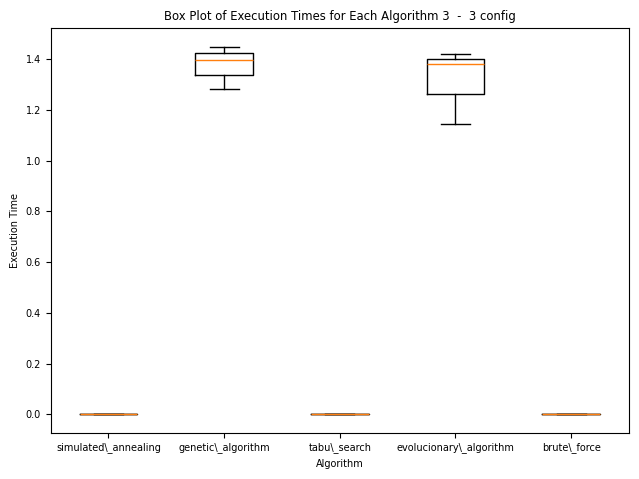

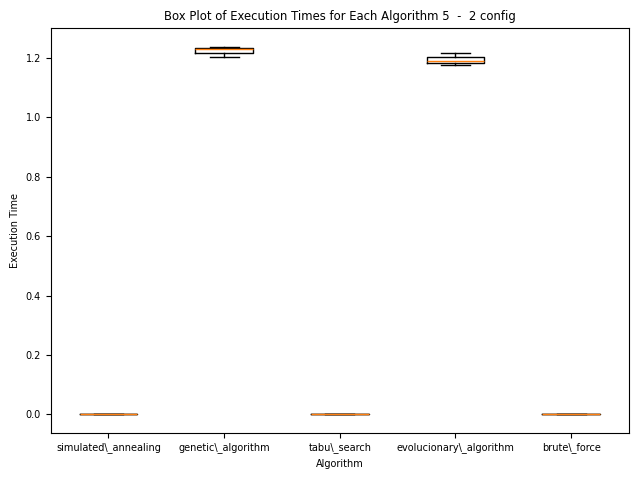

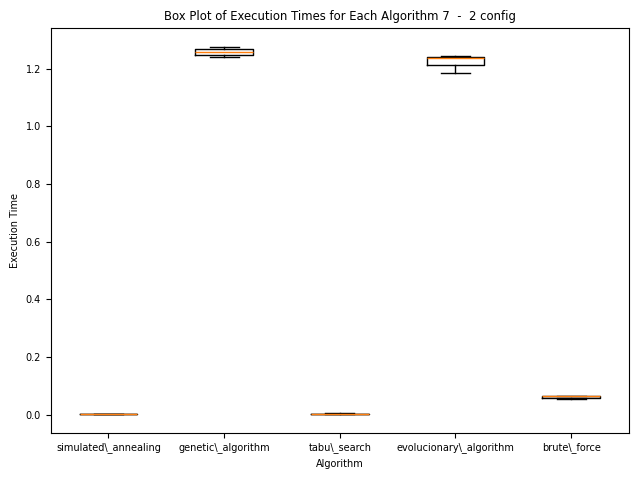

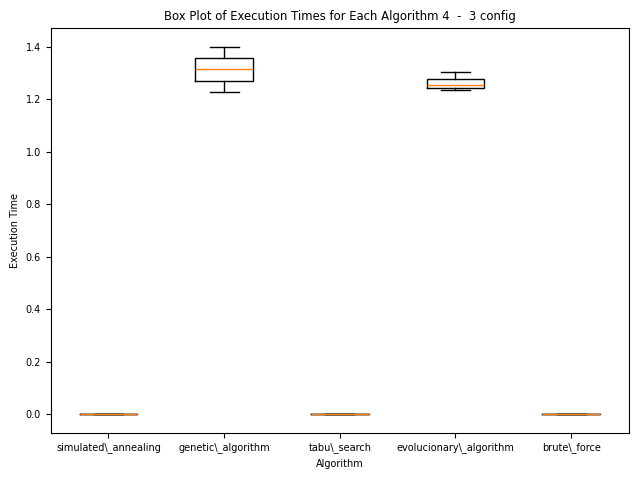

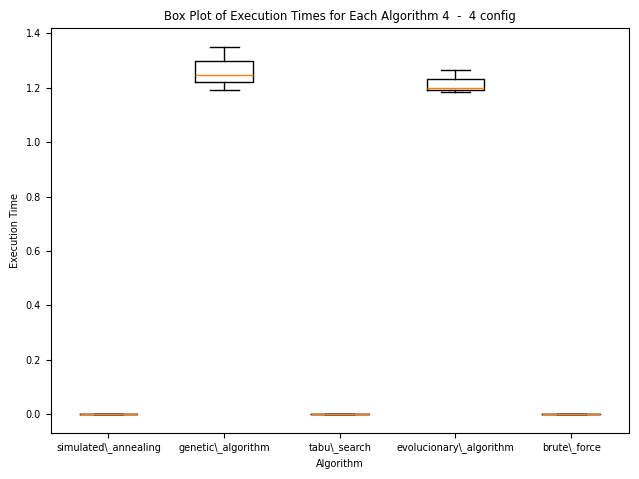

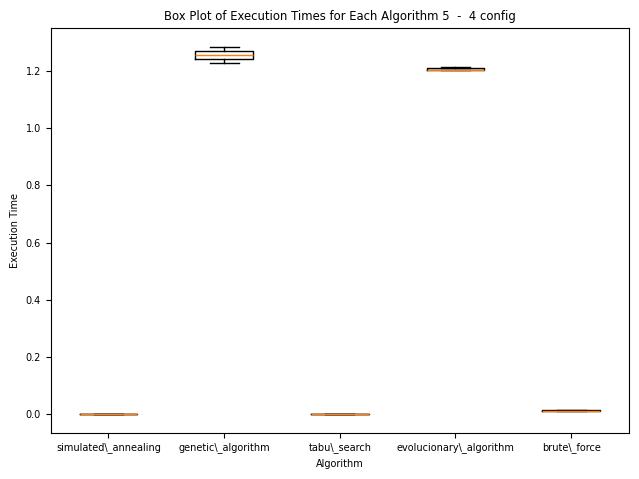

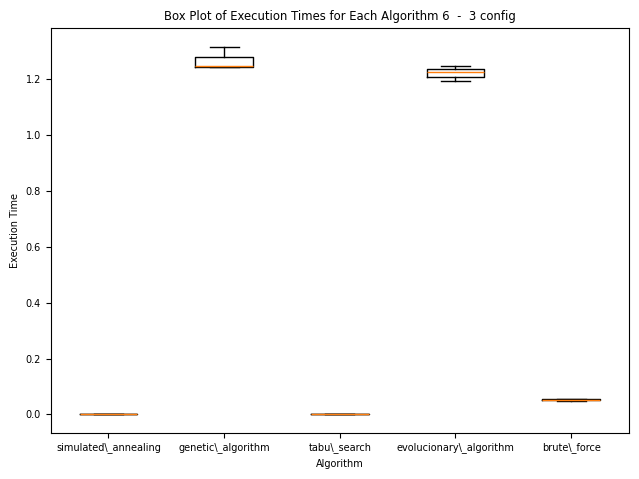

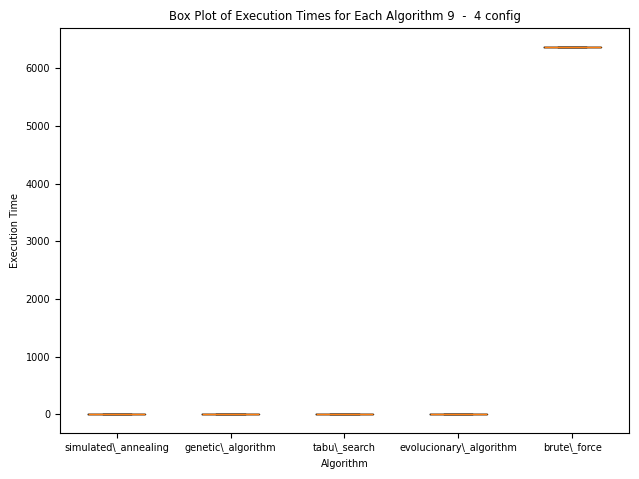

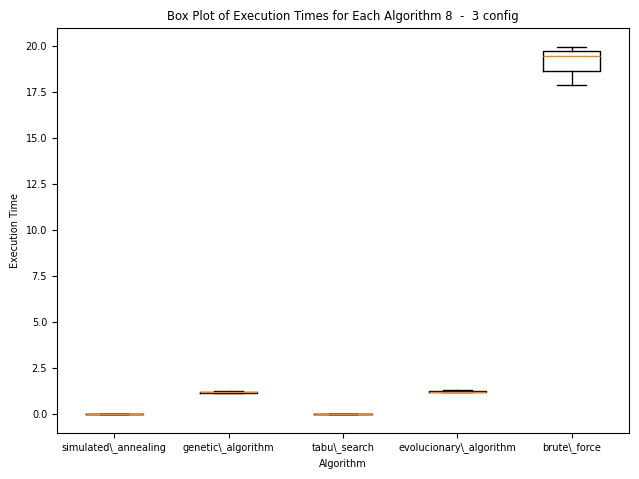

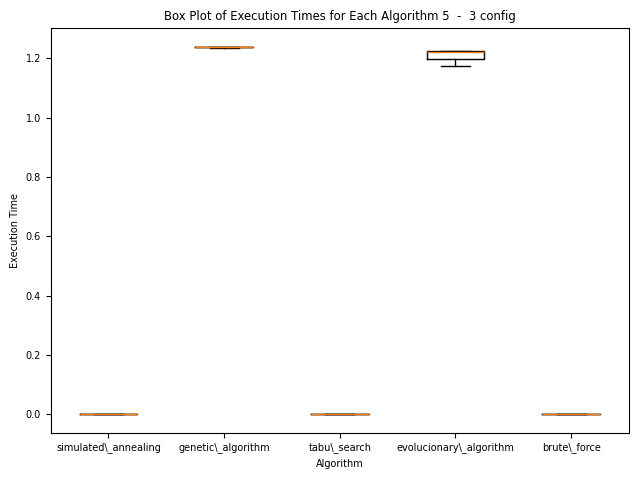

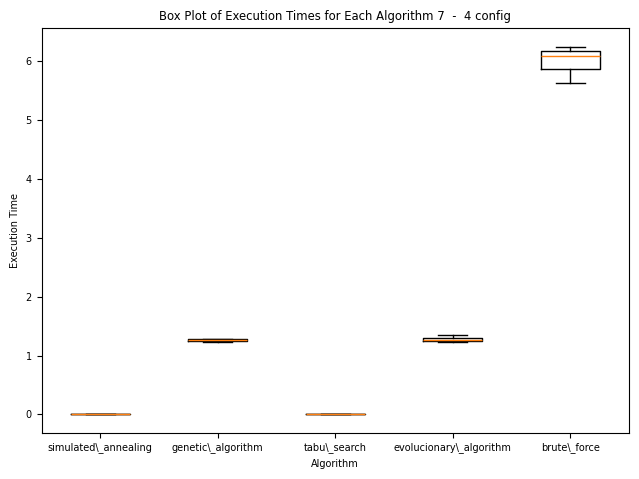

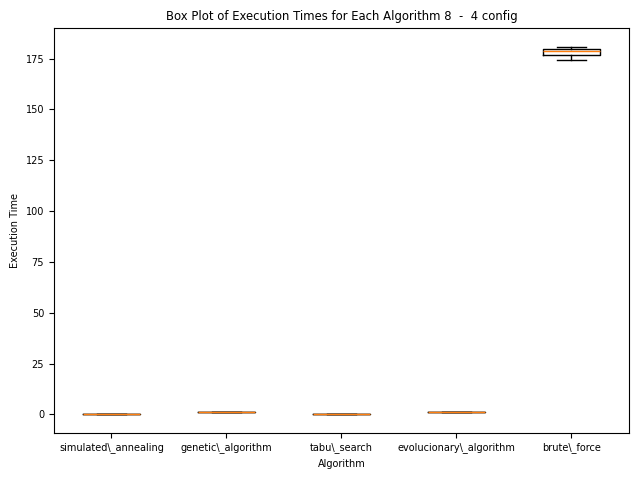

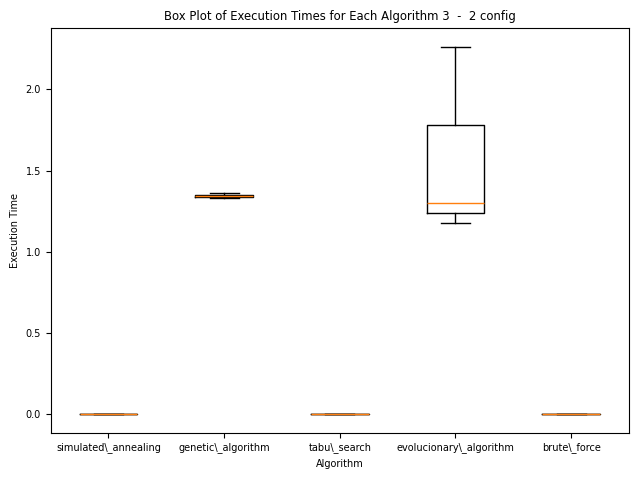

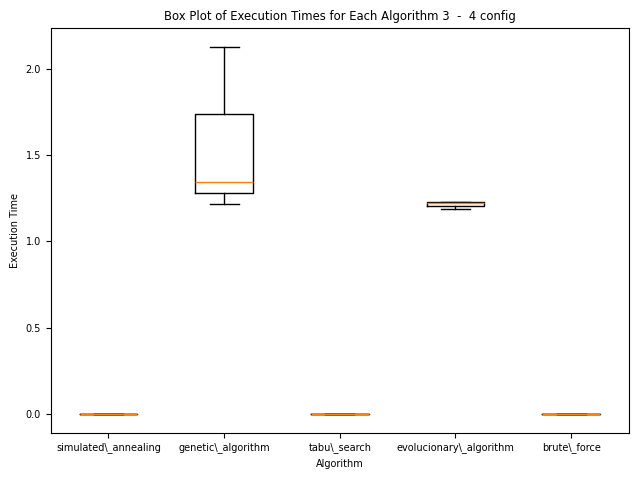

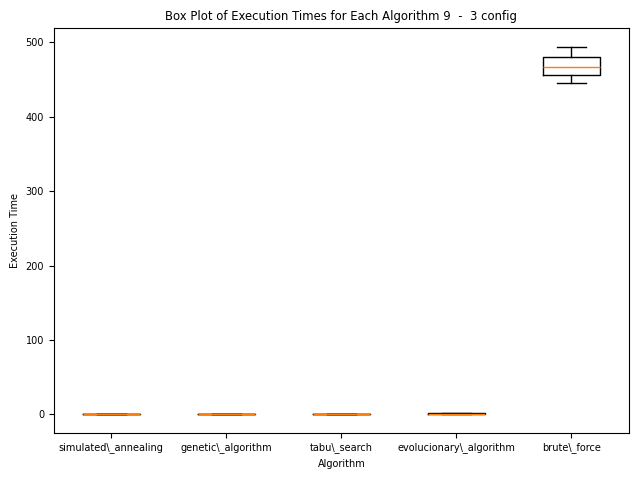

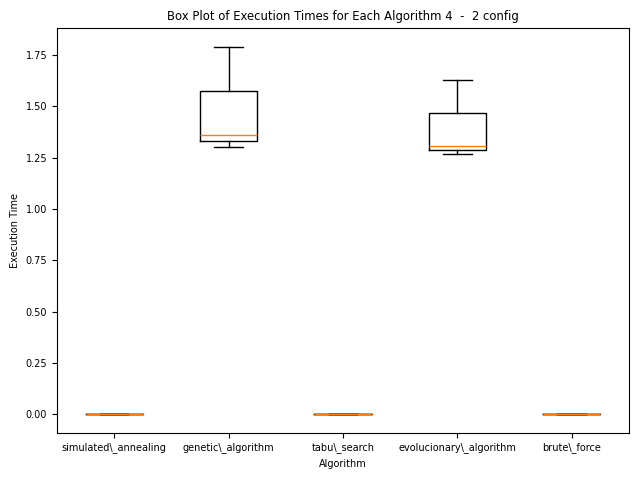

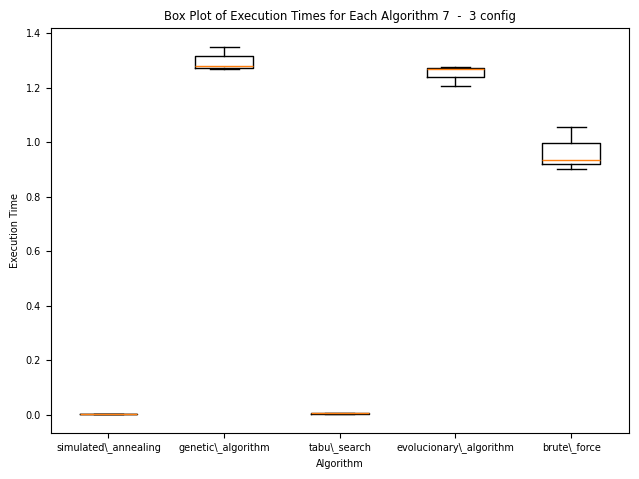

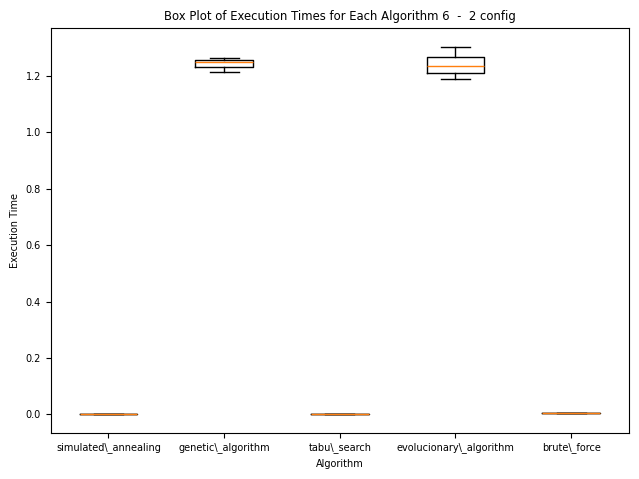

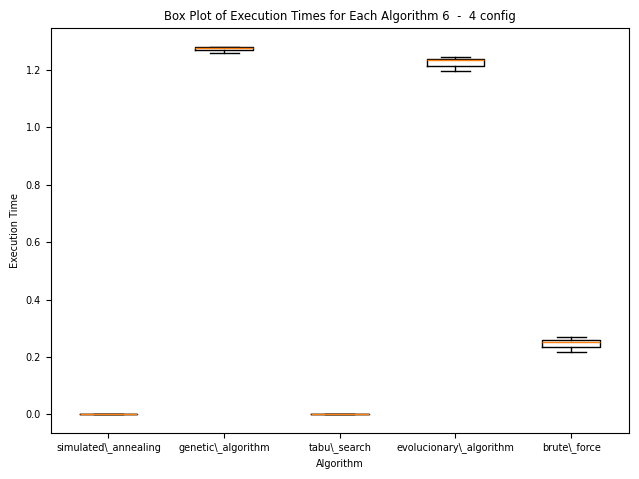

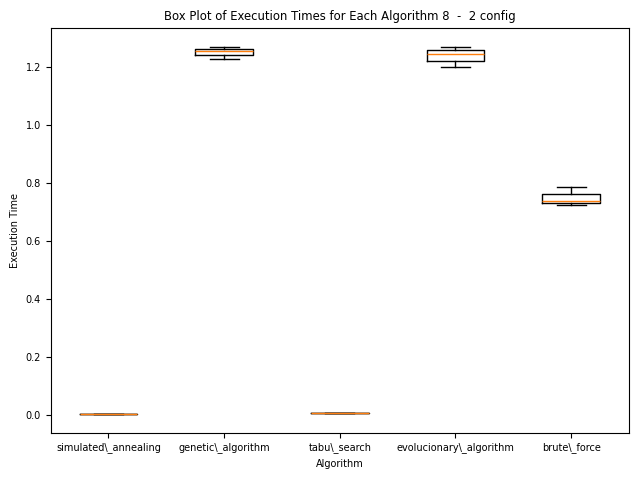

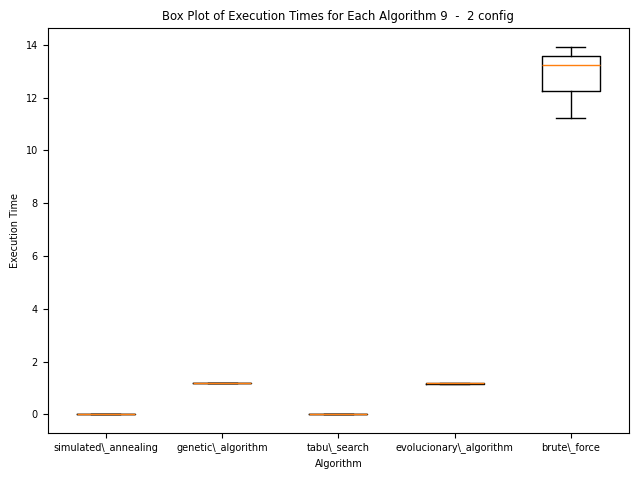

In [ ]:
#Bloxplot
import matplotlib.pyplot as plt


config_data = {algorithm: [] for algorithm in set_configurations}
for row in data:
    config_data[row[1]].append((row[0], row[2], row[3]))  # Add a tuple of execution number and execution time

config_data_executions = {algorithm: {config: [] for config in set_configurations} for algorithm in set_algorithm}

algorithms = ["brute\_force", "genetic\_algorithm", "evolucionary\\_algorithm", "tabu\_search", "simulated\_annealing"]
for config in config_data:
    algorithm_data = {algorithm: [] for algorithm in algorithms}

    for row in config_data[config]:
        algorithm_data[row[0]].append( row[2])  # Add a tuple of execution number and execution time
    ext_time= []
    for alg in set_algorithm:
        ext_time.append(algorithm_data[alg])
    for alg in algorithm_data:
        config_data_executions[alg][config].append(algorithm_data[alg])

    plt.rcParams.update({'font.size': 7})
    plt.boxplot(ext_time, labels=set_algorithm)
    plt.ylabel('Execution Time')
    plt.xlabel('Algorithm')
    plt.title('Box Plot of Execution Times for Each Algorithm ' +config + ' config' )
    plt.tight_layout()

    plt.show()



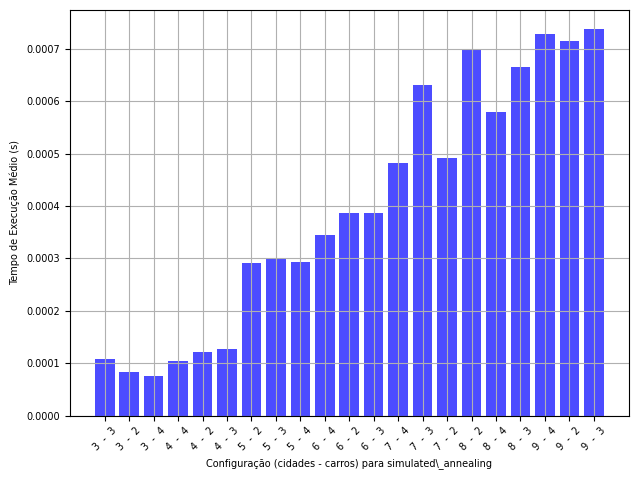

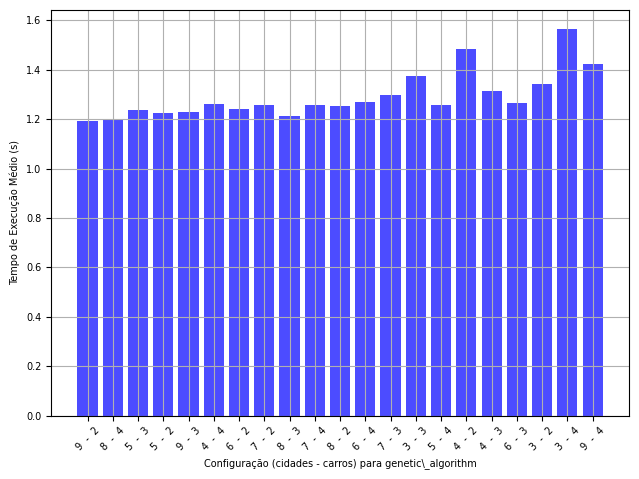

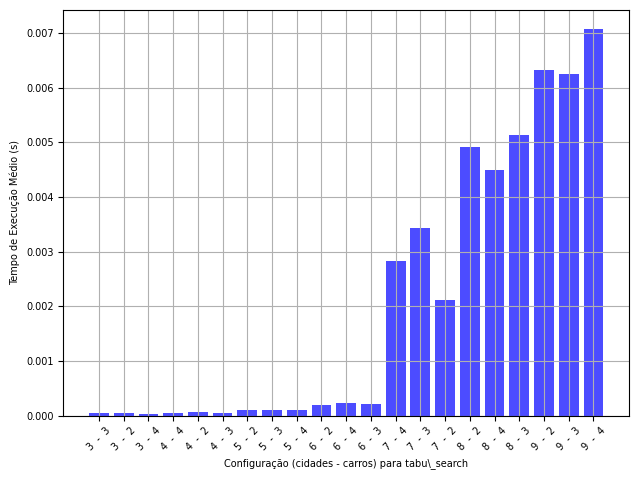

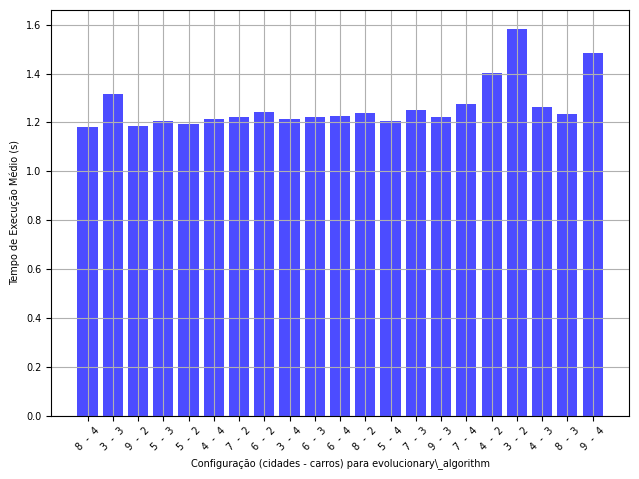

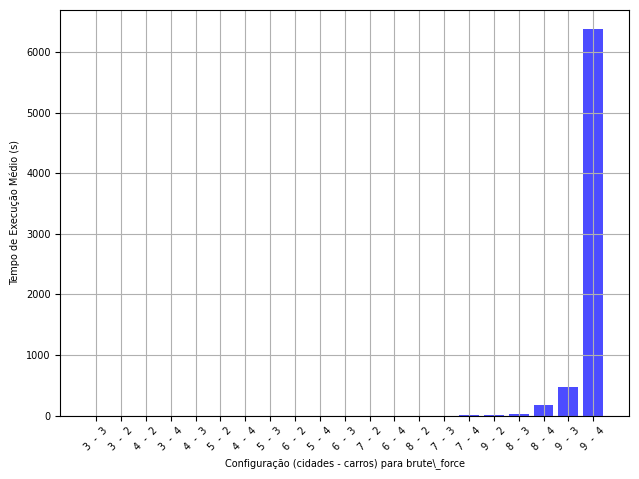

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for alg in config_data_executions:
    data = config_data_executions[alg]
    sorted_data = sorted(data.items(), key=lambda x:x[1])

    data = dict(sorted_data)
    average_data = {}

    for config, times in data.items():
        avg_time = np.mean(times)
        average_data[config] = avg_time

    fig, ax = plt.subplots()

    configs, avg_times = zip(*average_data.items())
    x_labels = [config for config in configs]

    ax.bar(x_labels, avg_times, color='blue', alpha=0.7)

    ax.set_xlabel('Configuração (cidades - carros) para '+ alg +'')
    ax.set_ylabel('Tempo de Execução Médio (s)')
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


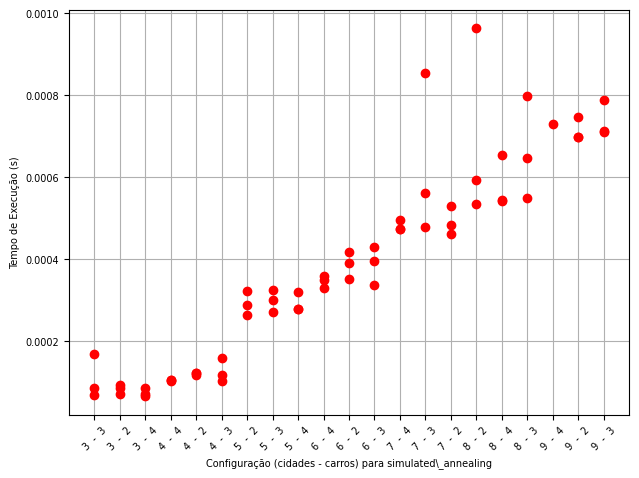

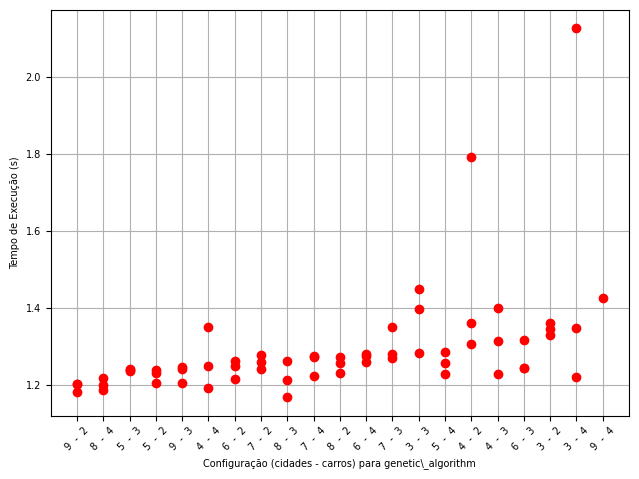

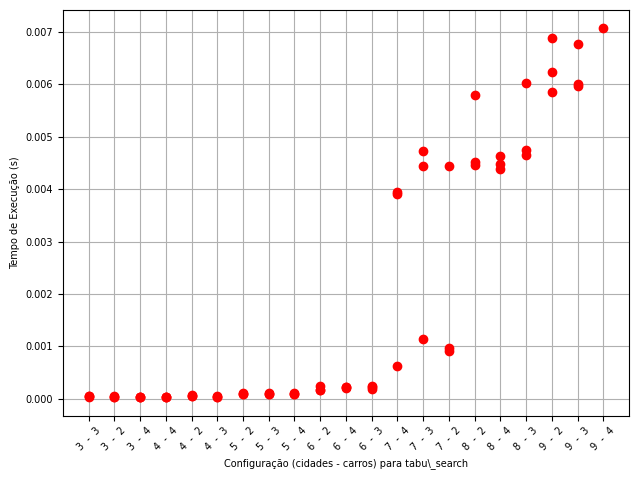

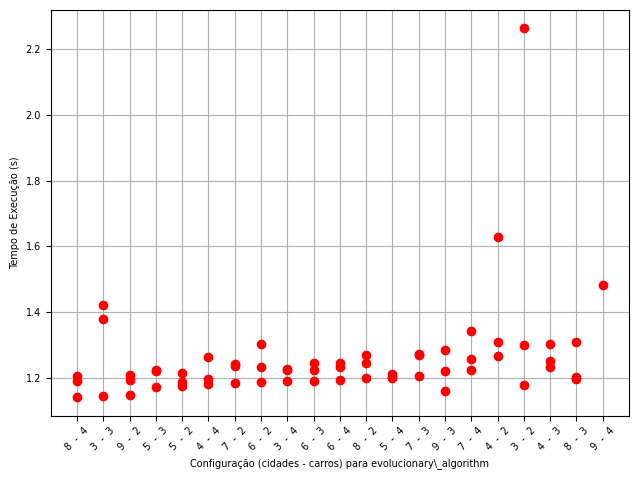

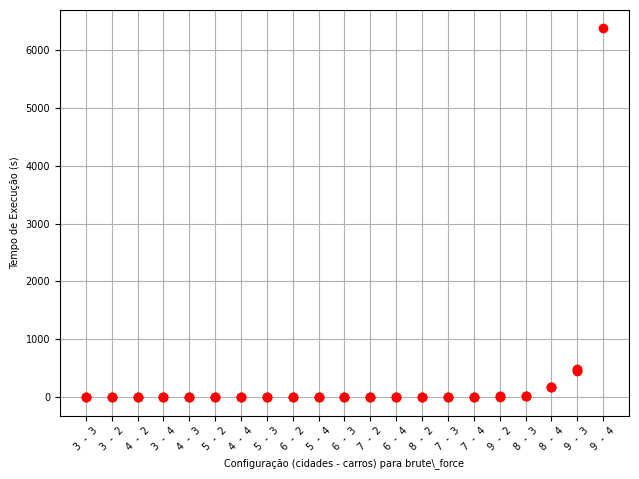

In [ ]:
import matplotlib.pyplot as plt

for alg in config_data_executions:
    data = config_data_executions[alg]
    sorted_data = sorted(data.items(), key=lambda x:x[1])

    data = dict(sorted_data)
    fig, ax = plt.subplots()

    for config, times in data.items():
        x = [config] * len(times)
        ax.plot(x, times, marker='o', label=config, color = "red")

    ax.set_xlabel('Configuração (cidades - carros) para '+ alg +'')
    ax.set_ylabel('Tempo de Execução (s)')
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


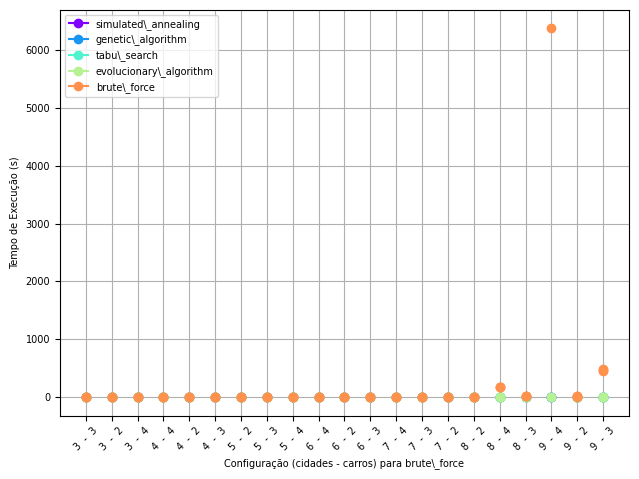

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

color = iter(cm.rainbow(np.linspace(0, 20, 100)))
fig, ax = plt.subplots()

for alg in config_data_executions:
    data = config_data_executions[alg]
    sorted_data = sorted(data.items(), key=lambda x:x[1])

    data = dict(sorted_data)

    colorNow = next(color)

    for config, times in data.items():
        x = [config] * len(times)
        ax.plot(x, times, marker='o', label=alg, color = colorNow)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlabel('Configuração (cidades - carros) para '+ alg +'')
ax.set_ylabel('Tempo de Execução (s)')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


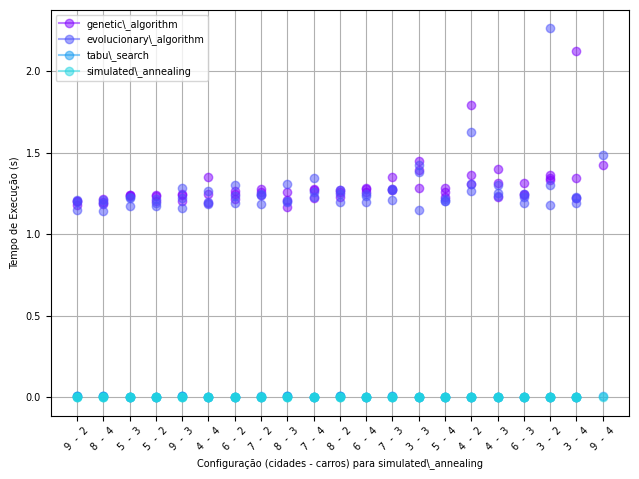

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
algorithms = [ "genetic\_algorithm", "evolucionary\\_algorithm", "tabu\_search", "simulated\_annealing"]
config_data_executions_now = {key: config_data_executions[key] for key in algorithms}

color = iter(cm.rainbow(np.linspace(0, 2, 20)))
fig, ax = plt.subplots()
for alg in config_data_executions_now:
    data = config_data_executions_now[alg]
    sorted_data = sorted(data.items(), key=lambda x:x[1])

    data = dict(sorted_data)

    colorNow = next(color)

    for config, times in data.items():
        x = [config] * len(times)
        ax.plot(x, times, marker='o', label=alg, color = colorNow,  alpha=0.5)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlabel('Configuração (cidades - carros) para '+ alg +'')
ax.set_ylabel('Tempo de Execução (s)')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


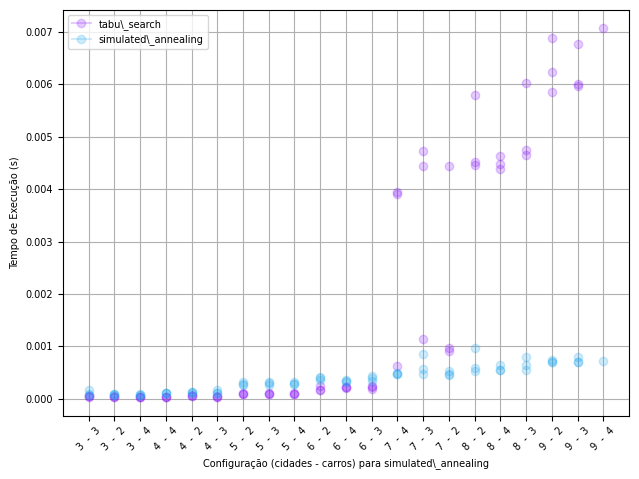

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
algorithms = ["tabu\_search", "simulated\_annealing"]
config_data_executions_now = {key: config_data_executions[key] for key in algorithms}

color = iter(cm.rainbow(np.linspace(0, 2, 10)))
fig, ax = plt.subplots()
for alg in config_data_executions_now:
    data = config_data_executions_now[alg]
    sorted_data = sorted(data.items(), key=lambda x:x[1])

    data = dict(sorted_data)

    colorNow = next(color)

    for config, times in data.items():
        x = [config] * len(times)
        ax.plot(x, times, marker='o', label=alg, color = colorNow,alpha=0.2)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlabel('Configuração (cidades - carros) para '+ alg +'')
ax.set_ylabel('Tempo de Execução (s)')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


[99, 186, 186, 222, 162, 102, 221, 221, 288, 172, 160, 197, 197, 321, 220, 112, 188, 188, 254, 137, 139, 162, 162, 313, 237, 126, 141, 141, 258, 159, 156, 156, 156, 221, 341, 136, 165, 165, 278, 222, 108, 223, 223, 161, 234, 149, 149, 149, 431, 305, 183, 183, 183, 243, 300, 131, 279, 279, 353, 327, 100, 100, 100, 385, 348, 60, 60, 60, 147, 218, 138, 239, 239, 416, 338, 81, 131, 131, 255, 395, 126, 160, 160, 320, 332, 161, 208, 205, 327, 510, 152, 180, 180, 345, 333, 227, 237, 245, 404, 377, 142, 178, 178, 348, 342, 146, 176, 217, 368, 357, 84, 194, 194, 310, 406, 104, 263, 256, 274, 359, 95, 116, 141, 426, 453, 137, 151, 168, 460, 329, 158, 253, 271, 378, 395, 214, 279, 281, 446, 412, 137, 189, 164, 387, 198, 120, 192, 213, 373, 479, 127, 203, 183, 351, 338, 135, 202, 173, 311, 428, 213, 226, 245, 492, 388, 60, 125, 146, 451, 403, 148, 308, 253, 448, 510, 128, 164, 207, 378, 351, 226, 257, 266, 540, 371, 132, 233, 195, 328, 329, 209, 242, 256, 498, 455, 239, 329, 288, 627, 476, 189, 28

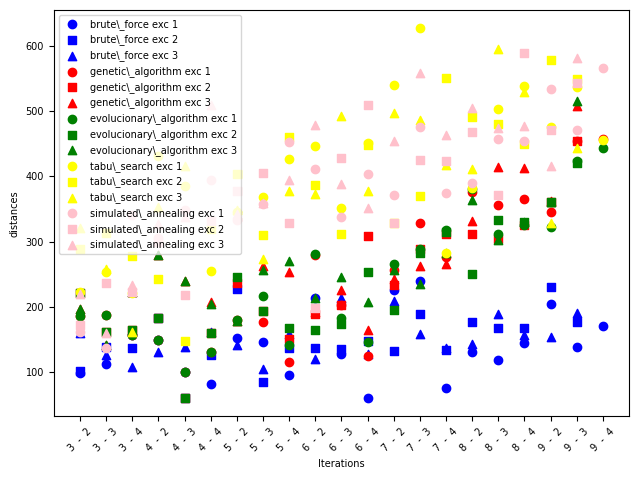

In [ ]:
import matplotlib.pyplot as plt

# Assume these are your results
exact_results = best_distances
metaheuristic_results = [90, 75, 65, 55, 45]
print(best_distances)
exact = best_distances[::5]
list_2 = best_distances[1::5]
list_3 = best_distances[2::5]
list_4 = best_distances[3::5]
list_5 = best_distances[4::5]
print(exact)
print(list_2)
print(list_3)
print(list_4)
print(list_5)

config = configurations[::5]
print(config)
listalg = ['brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing']
color = ['blue', 'red', 'green', 'yellow', 'pink']

def scatter_func(lista, num):
   plt.scatter(config[::3], lista[::3], label=listalg[num] + " exc 1", marker="o", color=color[num])
   plt.scatter(config[1::3], lista[1::3], label=listalg[num] + " exc 2", marker="s", color=color[num])
   plt.scatter(config[2::3], lista[2::3], label=listalg[num] + " exc 3", marker="^", color=color[num])

scatter_func(exact, 0)
scatter_func(list_2, 1)
scatter_func(list_3, 2)
scatter_func(list_4, 3)
scatter_func(list_5, 4)

plt.xlabel('Iterations')
plt.ylabel('distances')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend()
plt.show()


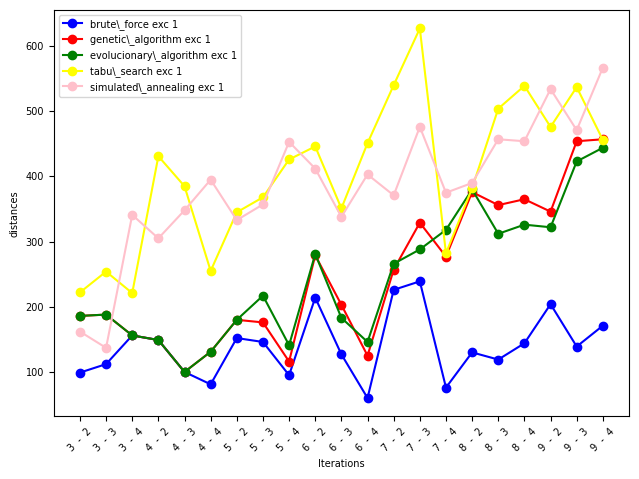

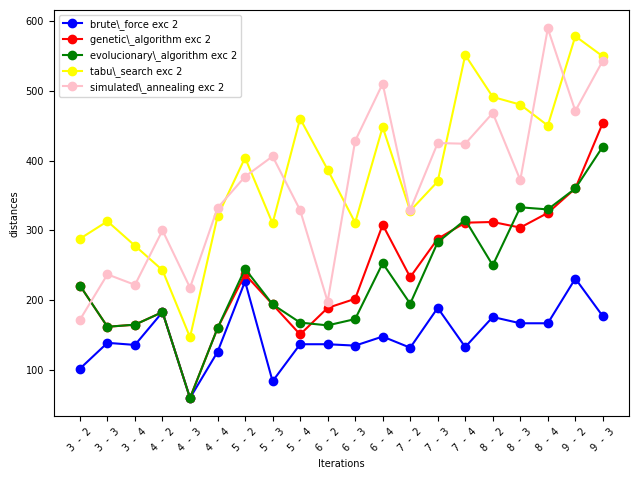

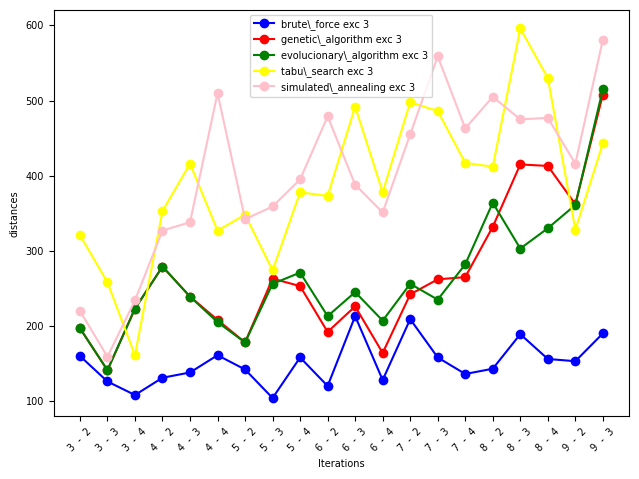

In [ ]:
for i in range(0,3):
  def scatter_func(lista, num):
    exc = i + 1
    plt.plot(config[i::3], lista[i::3], label=listalg[num] + " exc "+ str(exc), marker="o", color=color[num])

  scatter_func(exact, 0)
  scatter_func(list_2, 1)
  scatter_func(list_3, 2)
  scatter_func(list_4, 3)
  scatter_func(list_5, 4)

  plt.xlabel('Iterations')
  plt.ylabel('distances')
  ax.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()

  plt.legend()
  plt.show()


[99, 186, 186, 222, 162, 102, 221, 221, 288, 172, 160, 197, 197, 321, 220, 112, 188, 188, 254, 137, 139, 162, 162, 313, 237, 126, 141, 141, 258, 159, 156, 156, 156, 221, 341, 136, 165, 165, 278, 222, 108, 223, 223, 161, 234, 149, 149, 149, 431, 305, 183, 183, 183, 243, 300, 131, 279, 279, 353, 327, 100, 100, 100, 385, 348, 60, 60, 60, 147, 218, 138, 239, 239, 416, 338, 81, 131, 131, 255, 395, 126, 160, 160, 320, 332, 161, 208, 205, 327, 510, 152, 180, 180, 345, 333, 227, 237, 245, 404, 377, 142, 178, 178, 348, 342, 146, 176, 217, 368, 357, 84, 194, 194, 310, 406, 104, 263, 256, 274, 359, 95, 116, 141, 426, 453, 137, 151, 168, 460, 329, 158, 253, 271, 378, 395, 214, 279, 281, 446, 412, 137, 189, 164, 387, 198, 120, 192, 213, 373, 479, 127, 203, 183, 351, 338, 135, 202, 173, 311, 428, 213, 226, 245, 492, 388, 60, 125, 146, 451, 403, 148, 308, 253, 448, 510, 128, 164, 207, 378, 351, 226, 257, 266, 540, 371, 132, 233, 195, 328, 329, 209, 242, 256, 498, 455, 239, 329, 288, 627, 476, 189, 28

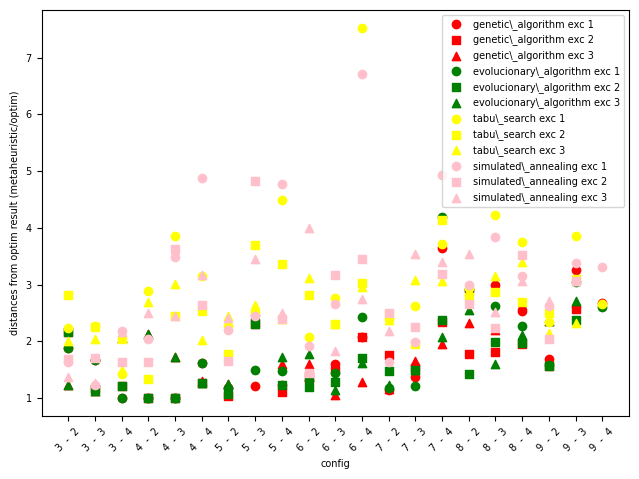

In [ ]:
import matplotlib.pyplot as plt

# Assume these are your results
exact_results = best_distances
metaheuristic_results = [90, 75, 65, 55, 45]
print(best_distances)
exact = best_distances[::5]
list_2 = best_distances[1::5]
list_3 = best_distances[2::5]
list_4 = best_distances[3::5]
list_5 = best_distances[4::5]
print(exact)
print(list_2)
print(list_3)
print(list_4)
print(list_5)

config = configurations[::5]
print(config)
listalg = ['brute\\_force', 'genetic\\_algorithm', 'evolucionary\\_algorithm', 'tabu\\_search', 'simulated\\_annealing']
color = ['blue', 'red', 'green', 'yellow', 'pink']

def scatter_func(lista, num):
   plt.scatter(config[::3], lista[::3], label=listalg[num] + " exc 1", marker="o", color=color[num])
   plt.scatter(config[1::3], lista[1::3], label=listalg[num] + " exc 2", marker="s", color=color[num])
   plt.scatter(config[2::3], lista[2::3], label=listalg[num] + " exc 3", marker="^", color=color[num])

scatter_func([i / j for i, j in zip(list_2, exact)], 1)
scatter_func([i / j for i, j in zip(list_3,exact)], 2)
scatter_func([i / j for i, j in zip(list_4,exact)], 3)
scatter_func([i / j for i, j in zip(list_5,exact)], 4)

plt.xlabel('config')
plt.ylabel('distances from optim result (metaheuristic/optim)')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend()
plt.show()
